In this notebook we go through each step of audio processing to gemerate midi notes for guitar solo from audio input

# this module handles audio loading and sampling





first connect my google drive

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


and install required packages

In [ ]:
!pip install spleeter noisereduce librosa pydub

now we can work with the input file for now and later switch to live feed

In [26]:
from pydub import AudioSegment
from IPython.display import Audio, display



def sample_audio(input_file, output_file, start_time, end_time):
    # sample the input audio file from start_time to end_time and saves the
    # segment to output_file
    # Load the MP3 file
    audio = AudioSegment.from_mp3(input_file)

    # Define start and end times for the segment (in milliseconds)
    start_time = start_time * 1000  # Convert to milliseconds
    end_time = end_time * 1000  # Convert to milliseconds

    # Slice the audio segment
    audio_segment = audio[start_time:end_time]


    # Save the audio segment as a new MP3 file
    audio_segment.export(output_file, format="mp3")

    # Convert to raw data for playback to check if we got the right segment
    display(Audio(output_file, autoplay=False))


def to_wav(input_file):
    # convert mp3 to wav
    audio = AudioSegment.from_mp3(input_file)
    audio.export(f"{input_file.split('.')[0]}.wav", format="wav")

def get_sample_rate(input_file):
    # get the sample rate of the input file
    audio = AudioSegment.from_mp3(input_file)
    return audio.frame_rate

def play_audio(input_file):
    # play the input file
    display(Audio(input_file, autoplay=False))


In [25]:
original_audio = '/content/gdrive/MyDrive/test/SCOM.mp3'
segment = '/content/gdrive/MyDrive/test/SCOM/segment.mp3'
segment_wav = f"{segment.split('.')[0]}.wav"

sample_audio(original_audio, segment, 0, 16)
to_wav(segment)
print(get_sample_rate(segment_wav))


48000


# This module handles preprocess

There's some simple preprocess we could perform like reduce noise

In [ ]:
# now we test some preprocessing

import noisereduce as nr
import librosa
import soundfile as sf

def reduce_noise(input_file):
    # Load audio
    audio, sr = librosa.load(input_file, sr=None)
    # Perform noise reduction
    reduced_noise_audio = nr.reduce_noise(y=audio, sr=sr)

    # Save the processed audio
    output_file = f"{input_file.split('.')[0]}_rn.wav"
    sf.write(output_file, reduced_noise_audio, sr)

    # next we could play the og file and cleaned file for comparison




Next, we create a audio player that shows the spectrogram with playback features for better interactive display.


# this module generates preliminary information about the source

In [ ]:

from spleeter.separator import Separator
import os

def separate_audio(input_file, output_path, stems="2stems"):
    # Create a separator with the specified number of stems.
    # Options are '2stems', '4stems', or '5stems'.
    separator = Separator(f'spleeter:{stems}')

    # Use the separator on the input file.
    separator.separate_to_file(input_file, output_path)

# Define the input audio file and the output directory
input_file = '/content/gdrive/MyDrive/test/flowers.mp3'
output_path = f'/content/gdrive/MyDrive/test/'

print(os.environ)
# Separate the audio file into different components
separate_audio(input_file, output_path, stems='2stems')

# The output will be in the specified directory with different stems as audio files.



environ({'SHELL': '/bin/bash', 'NV_LIBCUBLAS_VERSION': '12.2.5.6-1', 'NVIDIA_VISIBLE_DEVICES': 'all', 'COLAB_JUPYTER_TRANSPORT': 'ipc', 'NV_NVML_DEV_VERSION': '12.2.140-1', 'NV_CUDNN_PACKAGE_NAME': 'libcudnn8', 'CGROUP_MEMORY_EVENTS': '/sys/fs/cgroup/memory.events /var/colab/cgroup/jupyter-children/memory.events', 'NV_LIBNCCL_DEV_PACKAGE': 'libnccl-dev=2.19.3-1+cuda12.2', 'NV_LIBNCCL_DEV_PACKAGE_VERSION': '2.19.3-1', 'VM_GCE_METADATA_HOST': '169.254.169.253', 'HOSTNAME': '89db23fedc35', 'LANGUAGE': 'en_US', 'TBE_RUNTIME_ADDR': '172.28.0.1:8011', 'COLAB_TPU_1VM': '', 'GCE_METADATA_TIMEOUT': '3', 'NVIDIA_REQUIRE_CUDA': 'cuda>=12.2 brand=tesla,driver>=470,driver<471 brand=unknown,driver>=470,driver<471 brand=nvidia,driver>=470,driver<471 brand=nvidiartx,driver>=470,driver<471 brand=geforce,driver>=470,driver<471 brand=geforcertx,driver>=470,driver<471 brand=quadro,driver>=470,driver<471 brand=quadrortx,driver>=470,driver<471 brand=titan,driver>=470,driver<471 brand=titanrtx,driver>=470,dr

/usr/lib/python3.10/multiprocessing/popen_fork.py:66: RuntimeWarning: os.fork() was called. os.fork() is incompatible with multithreaded code, and JAX is multithreaded, so this will likely lead to a deadlock.
  self.pid = os.fork()


INFO:spleeter:Downloading model archive https://github.com/deezer/spleeter/releases/download/v1.4.0/2stems.tar.gz


INFO:spleeter:Downloading model archive https://github.com/deezer/spleeter/releases/download/v1.4.0/2stems.tar.gz


INFO:spleeter:Validating archive checksum


INFO:spleeter:Validating archive checksum


INFO:spleeter:Extracting downloaded 2stems archive


INFO:spleeter:Extracting downloaded 2stems archive


INFO:spleeter:2stems model file(s) extracted


INFO:spleeter:2stems model file(s) extracted
Instructions for updating:
Use output_signature instead
Instructions for updating:
Use output_signature instead
Instructions for updating:
Colocations handled automatically by placer.


INFO:spleeter:File /content/gdrive/MyDrive/test/flowers/vocals.wav written succesfully


INFO:spleeter:File /content/gdrive/MyDrive/test/flowers/vocals.wav written succesfully


INFO:spleeter:File /content/gdrive/MyDrive/test/flowers/accompaniment.wav written succesfully


INFO:spleeter:File /content/gdrive/MyDrive/test/flowers/accompaniment.wav written succesfully


next we visualize the song data for each track.

In [ ]:
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt

# this is the most barebone module to create specttrogram, will tune and iterate on top of this

def plot_waveform_and_spectrogram(audio_path, title):
    # Load the audio file
    y, sr = librosa.load(audio_path, sr=None)
    plt.figure(figsize=(12, 6))

    # Plot waveform
    plt.subplot(2, 1, 1)
    librosa.display.waveshow(y, sr=sr)
    plt.title(f'Waveform of {title}')
    plt.xlabel('Time (s)')
    plt.ylabel('Amplitude')

    # Plot spectrogram
    plt.subplot(2, 1, 2)
    S = librosa.feature.melspectrogram(y=y, sr=sr)
    S_DB = librosa.power_to_db(S, ref=np.max)
    librosa.display.specshow(S_DB, sr=sr, x_axis='time', y_axis='mel')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Mel Spectrogram of {title}')
    plt.tight_layout()

    plt.show()

In [ ]:
# Define paths to the original and separated stems
original_audio = '/content/gdrive/MyDrive/test/flowers.mp3'
vocals_path = '/content/gdrive/MyDrive/test/flowers/vocals.wav'
bass_path = '/content/gdrive/MyDrive/test/flowers/bass.wav'
drums_path = '/content/gdrive/MyDrive/test/flowers/drums.wav'
piano_path = '/content/gdrive/MyDrive/test/flowers/piano.wav'
other_path = '/content/gdrive/MyDrive/test/flowers/other.wav'
bz_path = '/content/gdrive/MyDrive/test/flowers/accompaniment.wav'

In [ ]:
# Plotting the original and separated stems
plot_waveform_and_spectrogram(original_audio, 'Original')


In [ ]:
plot_waveform_and_spectrogram(vocals_path, 'Vocals')

the default spectrogram does not look clear, need tuning. \
The first idea is to align the peroid for fourier transform with the beats of music.\
We use `librosa.beat.beatrack` for BPM estimation istead of manual input.

In [ ]:
# think of a way to tune the spectrogram
# should align the bpm and the step of the spectrogram

# so we align steps with beats
import numpy as np
import librosa
import matplotlib.pyplot as plt
import librosa.display

def plot_spectrogram(audio_path):
    # Load audio
    y, sr = librosa.load(audio_path, sr=None)  # using the original sample rate

    # find the bpm estimate by librosa
    BPM, beats = librosa.beat.beat_track(y=y, sr=sr)

    beats_per_second = BPM / 60
    time_per_beat = 1 / beats_per_second  # in seconds
    samples_per_beat = sr * time_per_beat


    # Compute the spectrogram
    n_fft = int(samples_per_beat*2)  # window size for the FFT
    hop_length = int(samples_per_beat / 2)  # half a beat overlap
    D = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))

    # Convert amplitude to dB
    S_DB = librosa.amplitude_to_db(D, ref=np.max)

    # Plot the spectrogram
    plt.figure(figsize=(14, 5))
    librosa.display.specshow(S_DB, sr=sr, hop_length=hop_length, x_axis='time', y_axis='log')
    plt.colorbar(format='%+2.0f dB')
    plt.title(f'Spectrogram of {audio_path.split("/")[-1]} aligned with beats')
    plt.show()


def load_and_compute_spectrogram(audio_path, sr=None):
    # instead of using the librosa included feateures,
    # we could tweak the parameters for more resolution

    # Load audio
    y, sr = librosa.load(audio_path, sr=sr)

    # find the bpm estimate by librosa
    BPM, beats = librosa.beat.beat_track(y=y, sr=sr)

    beats_per_second = BPM / 60
    time_per_beat = 1 / beats_per_second  # in seconds
    samples_per_beat = sr * time_per_beat


    # Compute the spectrogram
    n_fft = int(samples_per_beat)  # window size for the FFT
    hop_length = int(samples_per_beat / 2)  # half a beat overlap
    D = np.abs(librosa.stft(y, n_fft=n_fft, hop_length=hop_length))

    # Convert amplitude to dB
    S_DB = librosa.amplitude_to_db(D, ref=np.max)

    # Compute Mel spectrogram
    # S = librosa.feature.melspectrogram(y=y, sr=sr)
    # S_DB = librosa.power_to_db(S, ref=np.max)
    return S_DB, sr, n_fft, hop_length



def plot_spectrograms(audio_paths, titles):
    # plot spectrograms side by side
    plt.figure(figsize=(15, 10))
    n = len(audio_paths)

    for i, (path, title) in enumerate(zip(audio_paths, titles), start=1):
        S_DB, sr, n_fft, hop_length = load_and_compute_spectrogram(path)
        plt.subplot(n, 1, i)
        librosa.display.specshow(S_DB, sr=sr,n_fft=n_fft, hop_length=hop_length, x_axis='time', y_axis='mel')
        plt.colorbar(format='%+2.0f dB')
        plt.title(f'Mel Spectrogram of {title}')

    plt.tight_layout()
    plt.show()


# List of paths to the audio files (original and stems)
# audio_paths = [
#     original_audio,
#     vocals_path,
#     bass_path,
#     drums_path,
#     piano_path,
#     other_path
# ]
audio_paths = [
    vocals_path,
    bz_path
]
# audio_paths.append(f'{audio_paths[0].split(".")[0]}_rn.wav')
# Corresponding titles for the audio tracks
# titles = ['Original', 'Vocals', 'Bass', 'Drums','Piano', 'Other']
titles = ["vocal", 'accomp']


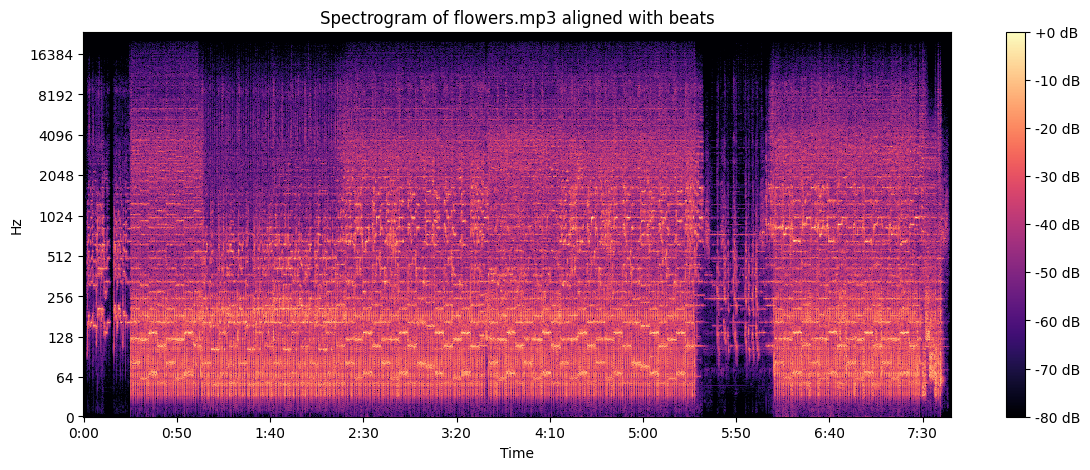

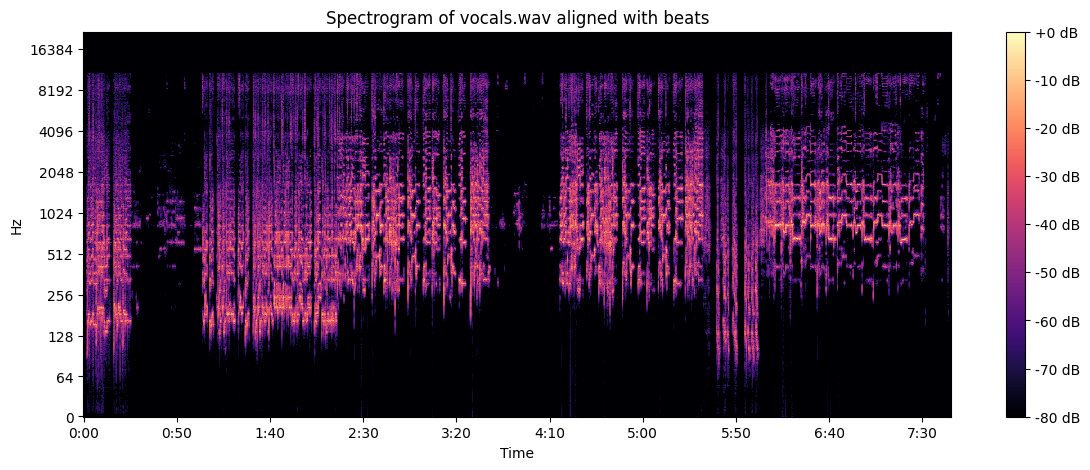

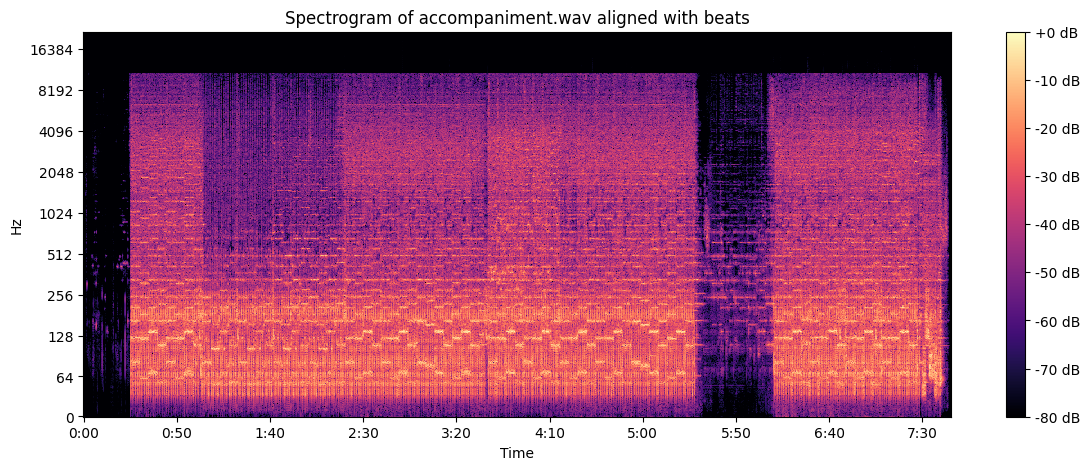

In [ ]:
plot_spectrogram(original_audio)
plot_spectrogram(vocals_path)
plot_spectrogram(bz_path)

the tweaked spectrograms looks promising and we can sort of see the vague highligts that resembles notes.

# Now we can further preprocess the music file for our ML pipeline


The first step in preprocess if done by `spleeter.separator.Separator`.\
 It uses a pretrained ML model to separate the instrumet tracks from the source.

# brainstorm section


consider the sound envelope for guitar recognition \
I would assume differnt guitar technique would cause this to differ but need data to confirm.
![picture](https://www.audiolabs-erlangen.de/resources/MIR/FMP/data/C1/FMP_C1_F22a-23.png)

also need to consider harmonic partial when implementing note recogition


what to do with tremolo/vibrato?